### Case Description
To predict the future medical expenses of patients based on certain factors as mentioned below:


Age,
Gender,
Body Mass Index,
Region,
Smoking Behaviour

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('med-insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data Cleaning:
Outliers and Null Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### OUTLIER REMOVAL

In [9]:
#Z-score
features=['age','bmi','children','expenses']
from scipy import stats
for i in enumerate(features):
 z = np.abs(stats.zscore(df[i[1]]))
 threshold = 3
 # Position of the outlier
 print(i[1],np.where(z > 3))

age (array([], dtype=int64),)
bmi (array([ 116,  847, 1047, 1317]),)
children (array([  32,   71,  166,  413,  425,  438,  568,  640,  877,  932,  937,
        969,  984, 1085, 1116, 1130, 1245, 1272]),)
expenses (array([  34,  543,  577,  819, 1146, 1230, 1300]),)


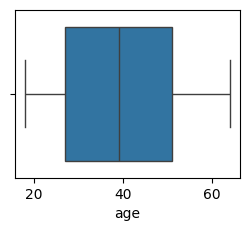

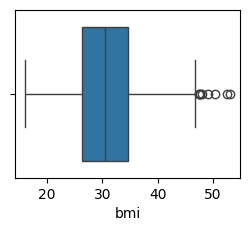

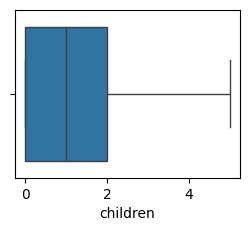

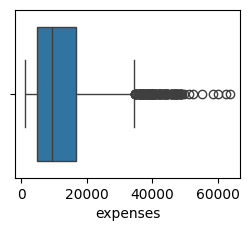

In [10]:
# outlier position using box plots
for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    sns.boxplot(x=i[1],data=df)
    plt.xlabel(i[1])
    plt.show()

In [11]:
#IQR Outlier Detection
for i in enumerate(features):
    Q1 = np.percentile(df[i[1]], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(df[i[1]], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print(i,df[i[1]].skew())

(0, 'age') 0.05567251565299186
(1, 'bmi') 0.28459296016731195
(2, 'children') 0.9383804401702414
(3, 'expenses') 1.51587966289798


In [12]:
#IQR Outlier Removal and getting a skewness between -1 to 1
for i in enumerate(features):
    Q1 = np.percentile(df[i[1]], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(df[i[1]], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    #df.drop(df[df[i[1]]>up_lim].index, inplace = True)
    #df.drop(df[df[i[1]]<low_lim].index, inplace = True)
    df[i[1]]=np.where(df[i[1]]>up_lim,up_lim,np.where(df[i[1]]<low_lim,low_lim,df[i[1]]))
    print(i,df[i[1]].skew())

(0, 'age') 0.05567251565299186
(1, 'bmi') 0.23323826740221834
(2, 'children') 0.9383804401702414
(3, 'expenses') 1.0817466638186126


In [13]:
for i in enumerate(features):
 z = np.abs(stats.zscore(df[i[1]]))
 threshold = 3
 # Position of the outlier
 print(i[1],np.where(z > 3))

age (array([], dtype=int64),)
bmi (array([], dtype=int64),)
children (array([  32,   71,  166,  413,  425,  438,  568,  640,  877,  932,  937,
        969,  984, 1085, 1116, 1130, 1245, 1272]),)
expenses (array([], dtype=int64),)


<Axes: xlabel='children'>

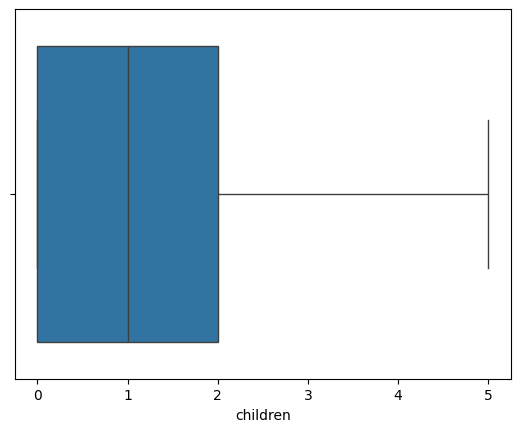

In [14]:
sns.boxplot(x='children',data=df)

In [15]:
df.iloc[32][3]

C:\Users\sneha\AppData\Local\Temp\ipykernel_22708\1009826434.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[32][3]


np.float64(5.0)

So, the outlier value of children column is 5, which we can keep 

## UNIVARIATE ANALYSIS

C:\Users\sneha\AppData\Local\Temp\ipykernel_22708\342016008.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'black')
C:\Users\sneha\AppData\Local\Temp\ipykernel_22708\342016008.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], color = 'orange')
C:\Users\sneha\

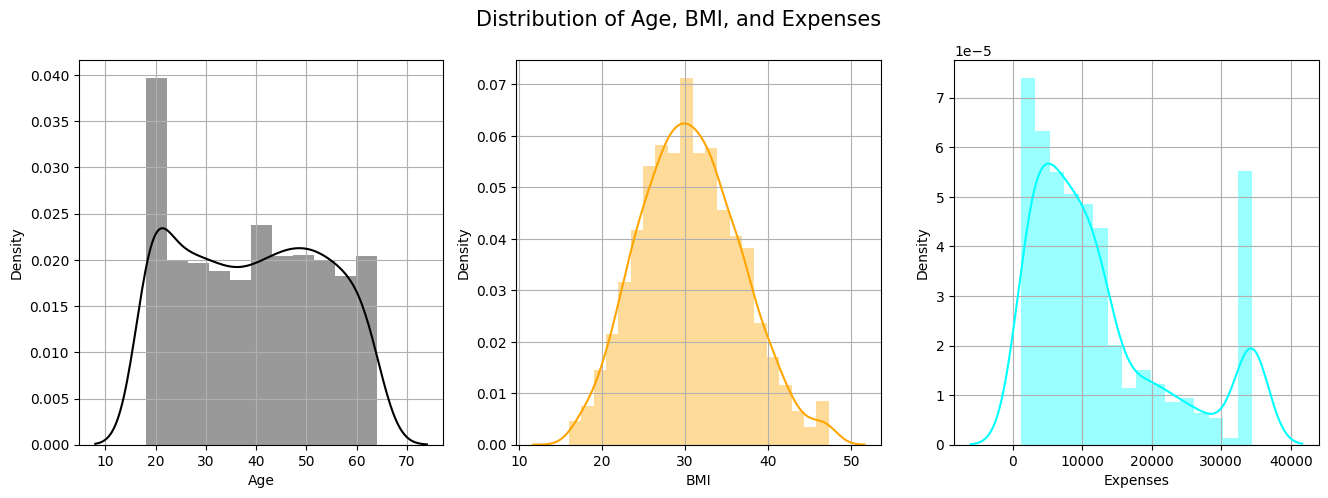

In [16]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 3, 1)
sns.distplot(df['age'], color = 'black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(df['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(df['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

##### Label Encoder for Categorical columns

In [17]:
df.sex = df.sex.astype('category').cat.codes
df.smoker = df.smoker.astype('category').cat.codes
df.region = df.region.astype('category').cat.codes

In [18]:
# sex 0=female, 1=male
# smoker 1=yes, 0=no
# region 1=northwest, 2=southeast, 3=southwest
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0,27.9,0.0,1,3,16884.92
1,18.0,1,33.8,1.0,0,2,1725.55
2,28.0,1,33.0,3.0,0,2,4449.46
3,33.0,1,22.7,0.0,0,1,21984.47
4,32.0,1,28.9,0.0,0,1,3866.86


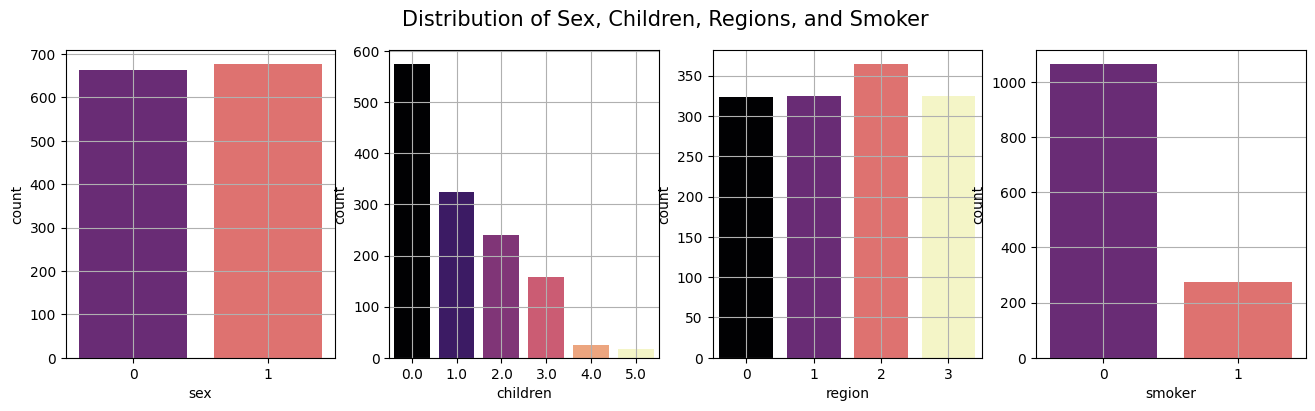

In [19]:
plt.figure(figsize=(16, 4))  # Adjust figure size for better visibility

plt.subplot(1, 4, 1)
sns.countplot(x=df['sex'], palette='magma', hue=df['sex'], legend=False)
plt.grid()

plt.subplot(1, 4, 2)
sns.countplot(x=df['children'], palette='magma', hue=df['children'], legend=False)
plt.grid()

plt.subplot(1, 4, 3)
sns.countplot(x=df['region'], palette='magma', hue=df['region'], legend=False)
plt.grid()

plt.subplot(1, 4, 4)
sns.countplot(x=df['smoker'], palette='magma', hue=df['smoker'], legend=False)
plt.grid()

plt.suptitle('Distribution of Sex, Children, Regions, and Smoker', fontsize=15)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
 6   expenses  1338 non-null   float64
dtypes: float64(4), int8(3)
memory usage: 45.9 KB


## BiVariate Analysis

<Axes: >

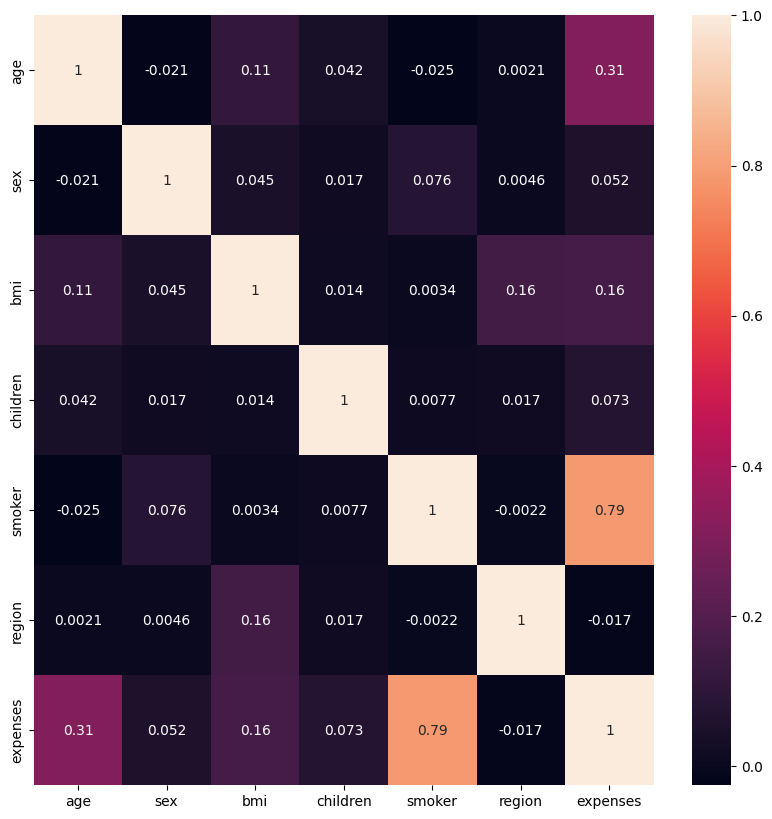

In [21]:
plt.figure(figsize=(10,10))
corr=df.corr(method='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [22]:
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.111996,0.042469,-0.025019,0.002127,0.313664
sex,-0.020856,1.000000,0.044817,0.017163,0.076185,0.004588,0.052244
bmi,0.111996,0.044817,1.000000,0.013580,0.003366,0.157689,0.160949
children,0.042469,0.017163,0.013580,1.000000,0.007673,0.016569,0.073116
smoker,-0.025019,0.076185,0.003366,0.007673,1.000000,-0.002181,0.785853
region,0.002127,0.004588,0.157689,0.016569,-0.002181,1.000000,-0.016991
expenses,0.313664,0.052244,0.160949,0.073116,0.785853,-0.016991,1.000000


### From this we can see that Expenses has a high correlation with the smoker column and considerable correlation with age and bmi column

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

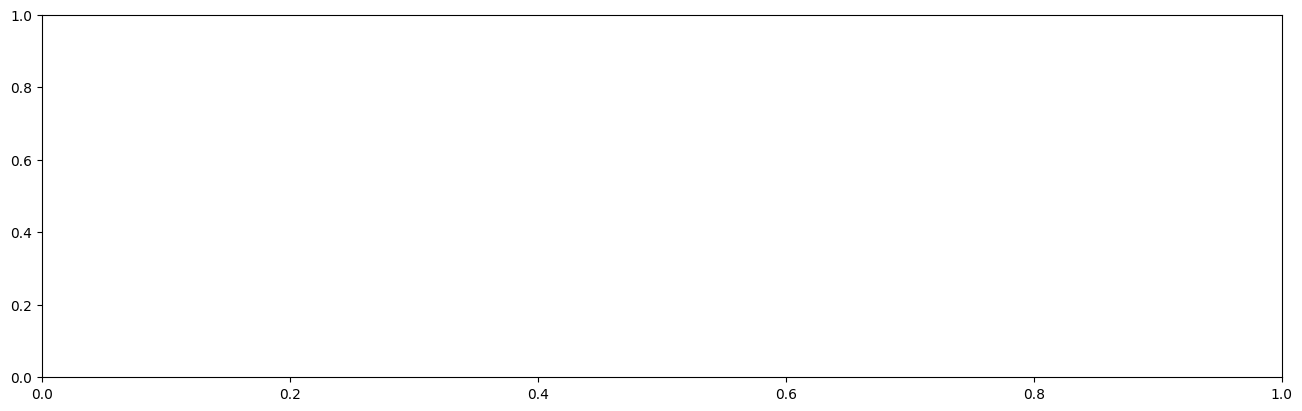

In [23]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.subplot(3, 1, 1)
sns.boxplot(df['smoker'], df['expenses'])

plt.subplot(3, 1, 2)
#plt.scatter(df['age'], df['expenses'])
sns.boxplot(x = pd.cut(df['age'],[18, 24, 30, 36, 42, 48, 54, 60, 66]) , y = 'expenses', data = df)

plt.subplot(3, 1, 3)
#plt.scatter(df['bmi'], df['expenses'])
sns.boxplot(x = pd.cut(df['bmi'], [16,18,20,22,24,26,28]) , y = 'expenses', data = df)

plt.suptitle('Impact of Smoking, Age and BMI on Expenses', fontsize = 20)
plt.show()

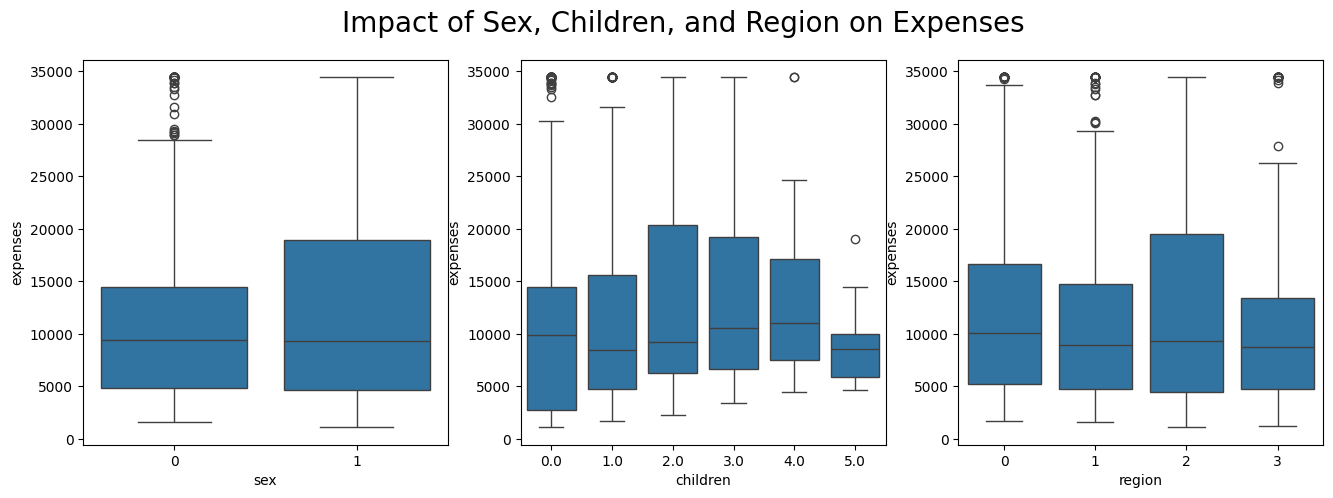

In [24]:
plt.rcParams['figure.figsize'] = (16, 5)

plt.subplot(1, 3, 1)
sns.boxplot(x=df['sex'], y=df['expenses'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df['children'], y=df['expenses'])

plt.subplot(1, 3, 3)
sns.boxplot(x=df['region'], y=df['expenses'])

plt.suptitle('Impact of Sex, Children, and Region on Expenses', fontsize=20)
plt.show()

#### Sex, Children and Region do not have any major impact on expenses independently

## MultiVariate Analysis

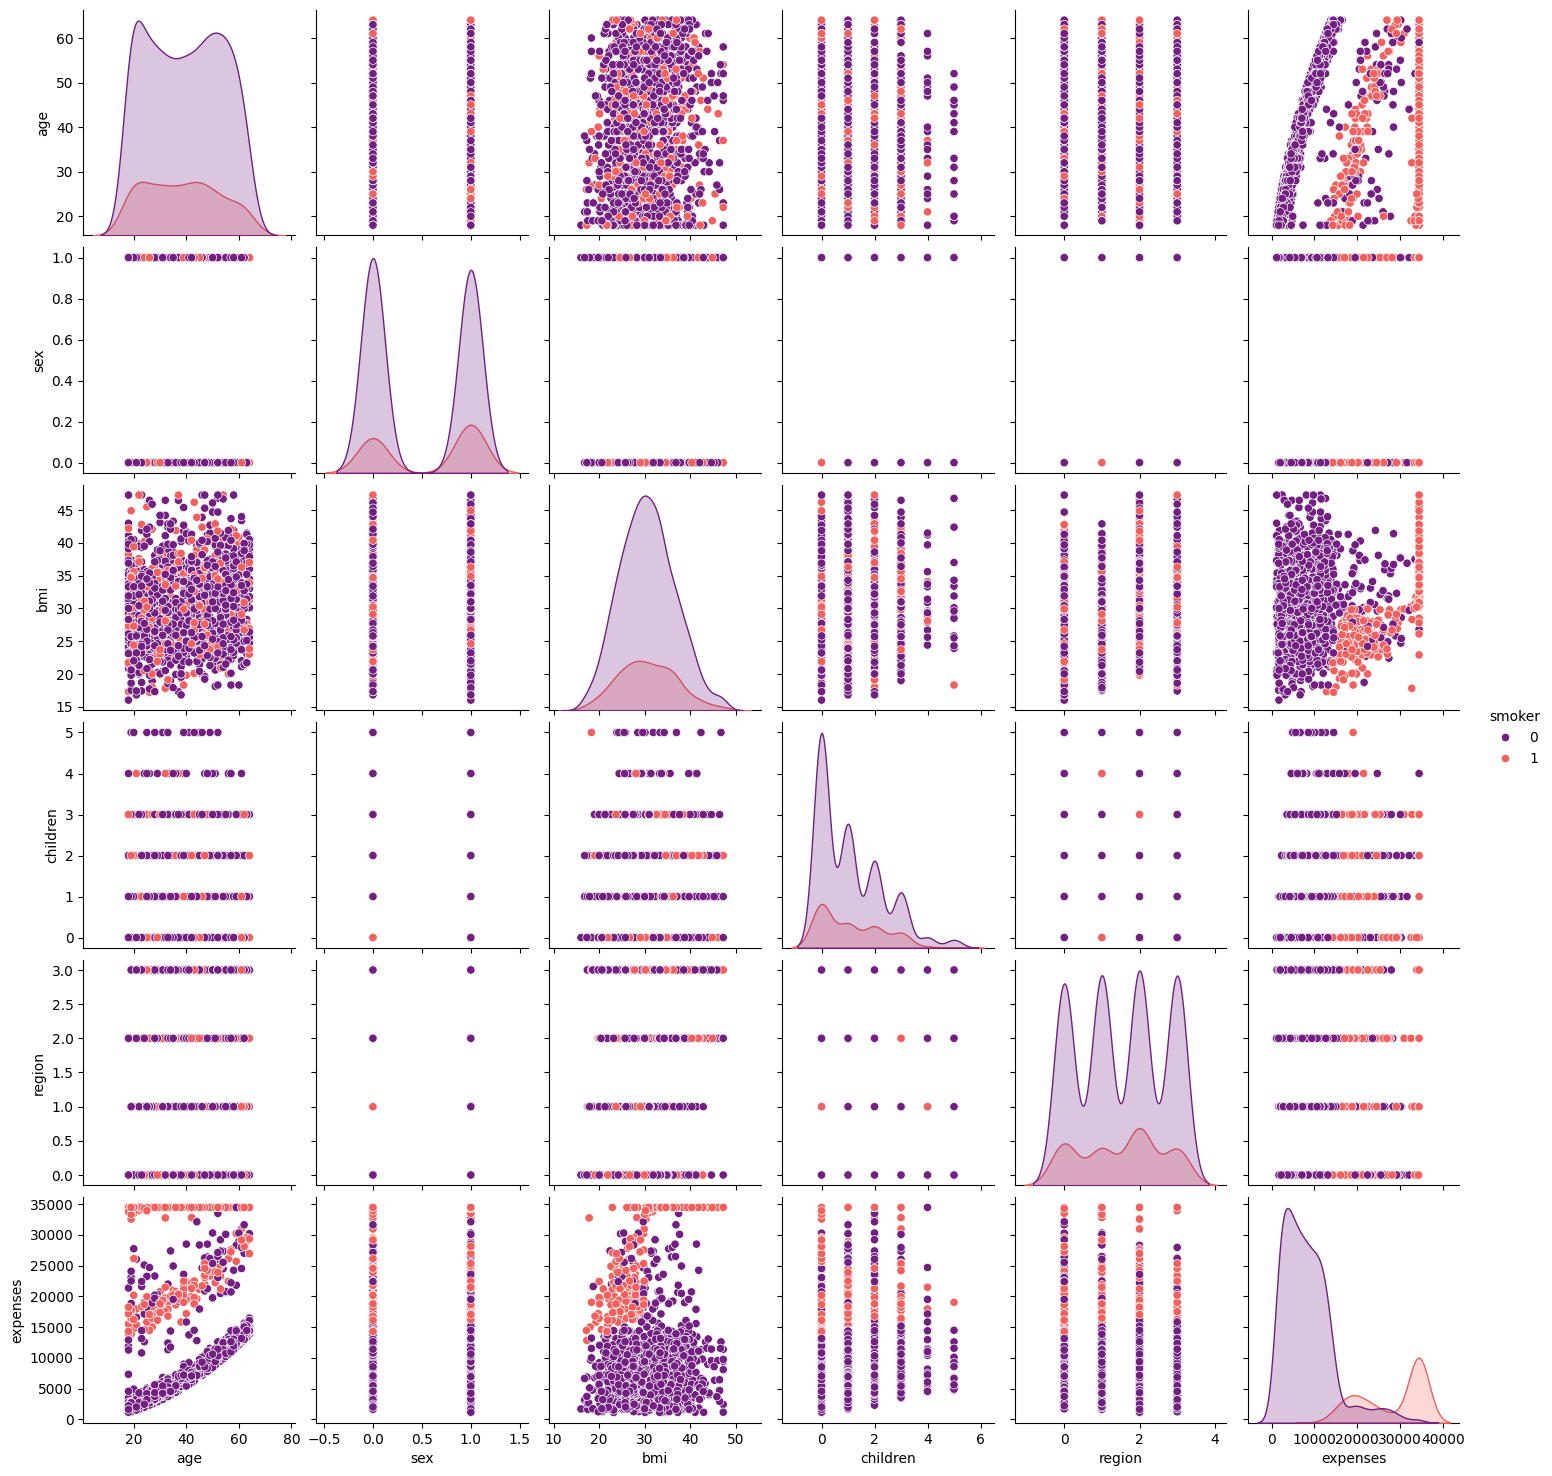

In [25]:
sns.pairplot(data=df,hue='smoker',palette='magma')

### Looking at the last row or last column
##### The following points were observed:
1) The Expenses of Smokers in all regions ranges from 20 to 60k, whereas the Expenses of Non Smokers in all regions ranges from 10 to 20K
2) The Lesser range of Expense is for lesser age people and vice versa.
3) BMI also has a pattern, for smoker with less BMI: Expense is around 20k
    For Smokers with High BMI: Expense is around 50K


In [26]:
# impact of Regions in Expenses
df[['expenses', 'region']].groupby(['region']).agg(['min', 'mean', 'max'])

expenses                          
            min          mean         max
region                                   
0       1694.80  12784.891327  34441.8175
1       1621.34  11845.329877  34441.8175
2       1121.87  13468.373207  34441.8175
3       1241.57  11680.717669  34441.8175

### Data Preprocessing

Regression Model

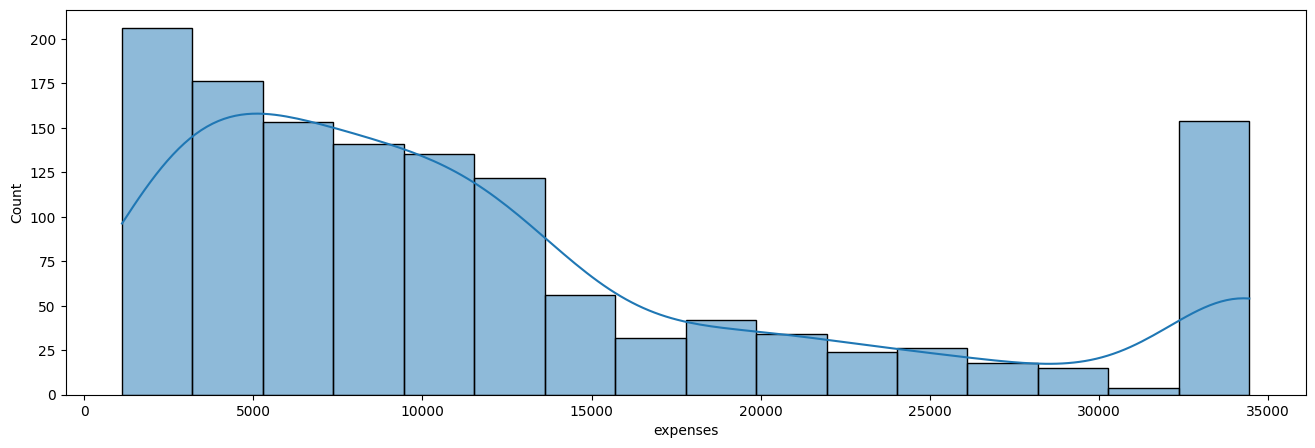

In [27]:
sns.histplot(df['expenses'], kde=True)  # kde=True adds a density curve
plt.show()

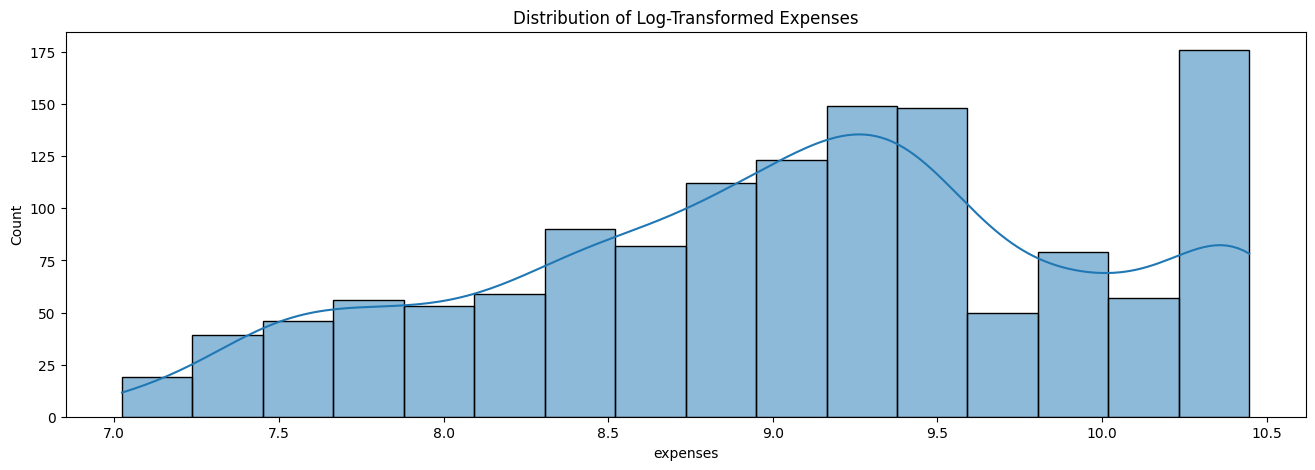

In [28]:
# Since the target column, here expenses is not skewed or in normal distribution, linear regression cannot be applied, 
# hence use logtransformation first
# Apply log transformation
df['expenses'] = np.log1p(df['expenses'])  # log1p(x) = log(x + 1), avoids log(0) issues

# Plot distribution using histplot
sns.histplot(df['expenses'], kde=True)
plt.title(
    "Distribution of Log-Transformed Expenses")
plt.show()

In [29]:
#Splitting
y = df['expenses']
x = df.drop(['expenses'], axis = 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Predictive Modeling

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [32]:
def accuracy_score(model):
    y_pred = model.predict(x_test)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    mse = (mean_squared_error(y_test, y_pred))
    rmse = np.sqrt(mse)
    return [(train_acc * 100), (test_acc * 100) , rmse]

In [33]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [34]:
model2 = Lasso(0.1)
model2.fit(x_train, y_train)

Lasso(alpha=0.1)

In [35]:
model3 = Ridge(0.1)
model3.fit(x_train, y_train)

Ridge(alpha=0.1)

In [36]:
model4 = DecisionTreeRegressor(max_depth = 3)
model4.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [37]:
model5 = RandomForestRegressor(max_depth = 4)
model5.fit(x_train, y_train)

RandomForestRegressor(max_depth=4)

In [38]:
from xgboost import XGBRegressor
model6 = XGBRegressor(max_depth = 2, learning_rate = 0.1)
model6.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
model7 = GradientBoostingRegressor()
model7.fit(x_train, y_train)

GradientBoostingRegressor()

In [40]:
results = pd.DataFrame(columns = ['Training Accuracy', 'Testing Accuracy', 'Root Mean Squared Error'],
                      index = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
                               'Decision Tree Regression', 'Random Forest Regression','XG Boost Regression','Gradient Boost Regression'])

In [41]:
results.loc['Linear Regression'] = accuracy_score(model1)
results.loc['Lasso Regression'] = accuracy_score(model2)
results.loc['Ridge Regression'] = accuracy_score(model3)
results.loc['Decision Tree Regression'] = accuracy_score(model4)
results.loc['Random Forest Regression'] = accuracy_score(model5)
results.loc['XG Boost Regression'] = accuracy_score(model6)
results.loc['Gradient Boost Regression'] = accuracy_score(model7)

In [42]:
results

,Training Accuracy,Testing Accuracy,Root Mean Squared Error
Linear Regression,74.478172,76.426287,0.425107
Lasso Regression,70.002308,72.620269,0.45814
Ridge Regression,74.478171,76.426775,0.425102
Decision Tree Regression,78.812437,79.368604,0.397693
Random Forest Regression,82.756565,84.572236,0.343903
XG Boost Regression,83.732126,84.450708,0.345254
Gradient Boost Regression,86.59615,86.27067,0.324421


In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model7, x, y, cv=7)
print(scores)

[0.87746748 0.79539411 0.70983906 0.9083179  0.90926425 0.70533907
 0.81042876]


as we can see that the scores are not varying much, so we can say that this model is good.

<Axes: >

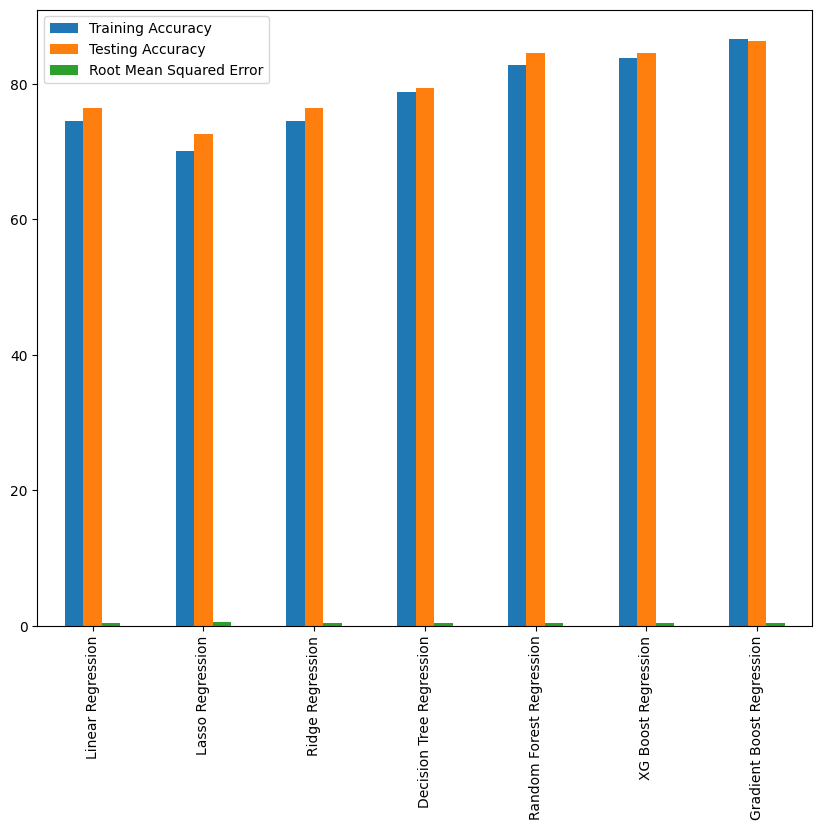

In [44]:
plt.rcParams['figure.figsize'] = (10, 8)
results.plot(kind='bar')

In [45]:
import pickle

with open("medical_expense_model.pkl", "wb") as file:
    pickle.dump(model7, file)